# Project - Beating Horse Racing Markets


_Adam Corren_

## Project Objective
Through exploratory analysis, we aim to establish the reliability of observed market trends and patterns within the UK and Ireland horse racing markets.

## Preamble
After celebrating my 18th birthday and eager to earn some extra income, I stumbled upon the exciting world of matched betting. This strategy leverages generous bookmaker promotions, such as free bets and bet boosts, aimed at attracting new customers (primarily on football/horse racing betting). As I continued to explore this industry, I began to notice recurring patterns and trends within horse racing exchange markets. This, combined with my interest in financial exchanges, an aspiration to delve into the general world of data analysis/science, and a growing disinterest in my academic studies, fuelled my desire to conduct further research and investigation...

Prior to turning 18, my exposure to horse racing was limited to the occasional Grand National; I had never attended a horse racing event nor had any particular interest in the sport. However, what did fascinate me about the sport was its betting markets. Compared to other sports, horse racing offers an abundance of daily markets to choose from, and what sets it apart from other sports such as football (which also offer many daily markets to choose from) is the unparalleled volatility, unpredictability, and malleability of its betting markets. Furthermore, the act of earning profits through sports exchanges, although practically identical to the process of trading on any other financial exchange is classified as 'gambling' by the government, meaning it is not subjected to income tax (which wasn't exactly a disincentive). 

My coding journey began in late 2017/ early 2018, during the latter stages of upper sixth form. After a year of getting to grips with the basics of python whilst primarily using Excel and VBA scripts to collect, manually clean and analyse data, I progressed to using more sophisticated Python scripts by 2019. Although these initial scripts were far from perfect, they allowed me to begin collecting daily data and analysing it in a matter of seconds, compared to hours.

Unfortunately, the unforeseen 6-12 month COVID-19 hiatus that greatly impacted global sports, (including horse racing which completely stopped for several months) hindered my progress. Despite this setback, I persevered and eventually produced some initial algorithms by mid to late 2020. The forthcoming four posts recount the pivotal aspects of this journey, culminating in four of the most fundamental and critical early studies based on collected data. Although these four studies represent only around half of the assumptions that I had intended to explore, they served as the impetus for countless additional explorations, which ultimately led to the development of the algorithms and systems that I currently employ today.

## Project Steps

This project consists of 3 main stages:
- Collecting daily horse racing data by scraping websites/accessing historical data using the Python package `requests` and using the Python library `BeautifulSoup`, which efficiently extracts HTML code. After obtaining the necessary data from various websites, we have the following pieces of information to use for the next 2 steps of our project:


    - Individual race information (such as distance, weather conditions, number of runners in race)
    - Individual race result data (such as finishing time, positions)
    - Individual horse data (such as form, rating, jockey/trainer)
    - Bookmaker market data (such as hourly price movements, race favorites/outsiders)
    - Exchange market data (such as volume traded, back/laying data)
    
  
- Using the Python libraries `pandas` and `NumPy` for the purpose of data cleaning and wrangling, data we collected in step one, in order to generate new metrics that will facilitate the analysis process. These unique data points will reveal information that enables us to explore more areas, such as:


    - Comparison of data procured from different sources
    - Comparison of data logged at different times
    - Comparison of data pertaining to different event types.
  
  
- In order to investigate the trends that were previously assumed to exist in the horse racing market during the initial twelve months of monitoring and using these platforms (whilst match betting), we will conduct an exploratory analysis of the data that has been collected and generated in previous steps. The following assumptions will be examined:


    - Whether exchange prices are superior to their bookmaker equivalents
    - Whether outsiders are less accurately priced compared to favourites
    - Whether there is uncertainty in the market regarding the movement of prices between the initial release and the race
      start.
    - Whether there is uncertainty in the market when there are significant differences in starting prices offered from
      various suppliers.

# 1) Collecting data

The following sub-items describe the steps involved in the data collection process:

1.1) The general strategy employed for web scraping.

1.2) Function to extract the URLs for daily individual racecards and results from the website, https://www.sportinglife.com.

1.3) Function to extract content from the URLs.

1.4) Function to extract daily racecard horse information from the website, https://www.sportinglife.com.

1.5) Function to extract daily racecard race information from the website, https://www.sportinglife.com.

1.6) Function to extract daily result data from the website, https://www.sportinglife.com.

1.7) The process of collecting hourly price data from the websites https://www.sportinglife.com and https://www.timeform.com.

1.8) The general strategy for extracting historical exchange data.

1.9) Function to extract daily exchange market data from the website, https://promo.betfair.com/betfairsp/prices.

1.10) Finally, all the data collected is combined into a single daily data frame and exported to a CSV file.

### Comment:
- In this notebook we will be getting the data of races taking place on the date 2nd November 2022. 

In [1]:
# importing necessary packages
import datetime
from datetime import timedelta
import requests
import pandas as pd
import io
import re
import warnings
from bs4 import BeautifulSoup
from functools import reduce
from IPython import display
from IPython.display import Image

# applying pandas settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# setting date
day = datetime.datetime(2022, 11, 2)

    
## 1.1) Web Scraping Strategy

The general strategy to web scrape HTML from a website is:

- Use the `requests` Python packages to make a `.get` request:
        
        uClient = requests.get(URL, headers={'User-Agent': 'Mozilla/5.0'})


- Create a `BeautifulSoup object` from the HTML:
        
        page_html = uClient.content
        soup = BeautifulSoup(page_html, 'html.parser')

- We then use `.find/find_all` to extract the specific containers where the information we require is stored by pulling their specific tags and/or attributes:
        
        containers = soup.findAll("div", {"class": "Runner_info"})
        
- Next, we isolate the child container containing the specific information we want:

        for container in containers:
            horse_name = container.find("div", {"class": "ResultRunner__name"})

- Finally we extract the information from the container, in this case we just want the name (text):

        name = horse_name.text

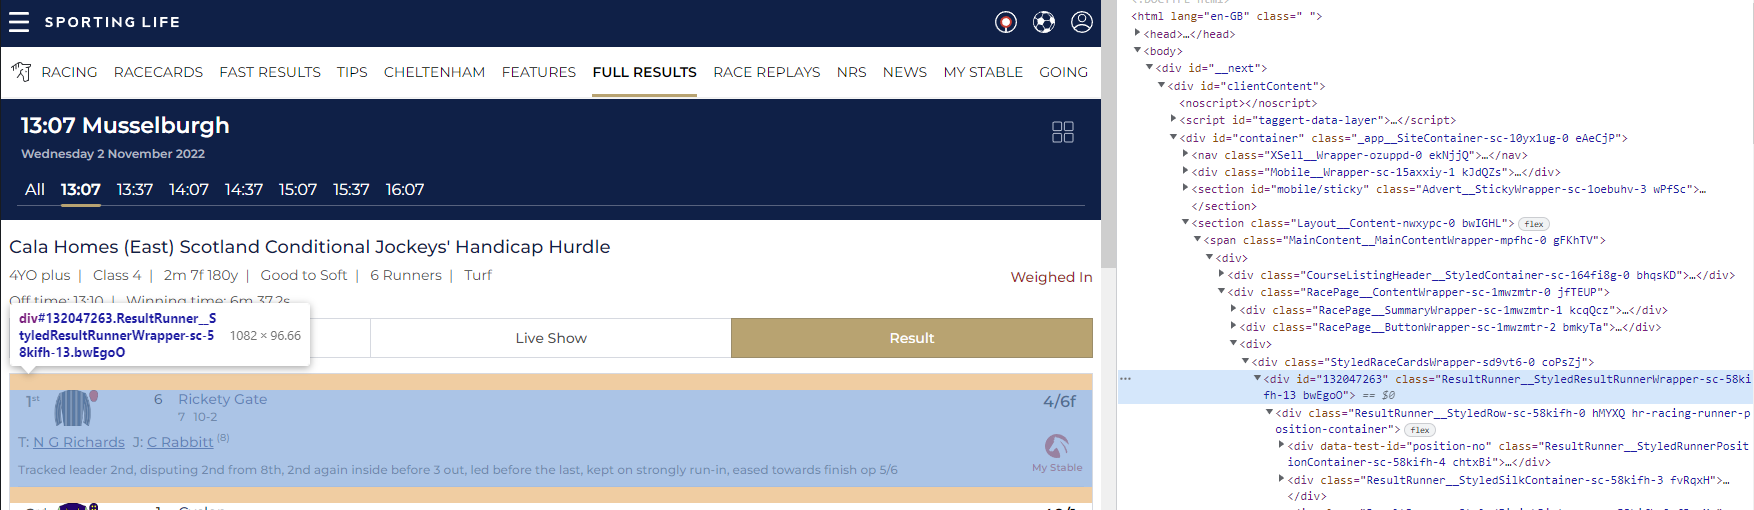

In [2]:
Image(filename='image 1.png', width=1000)

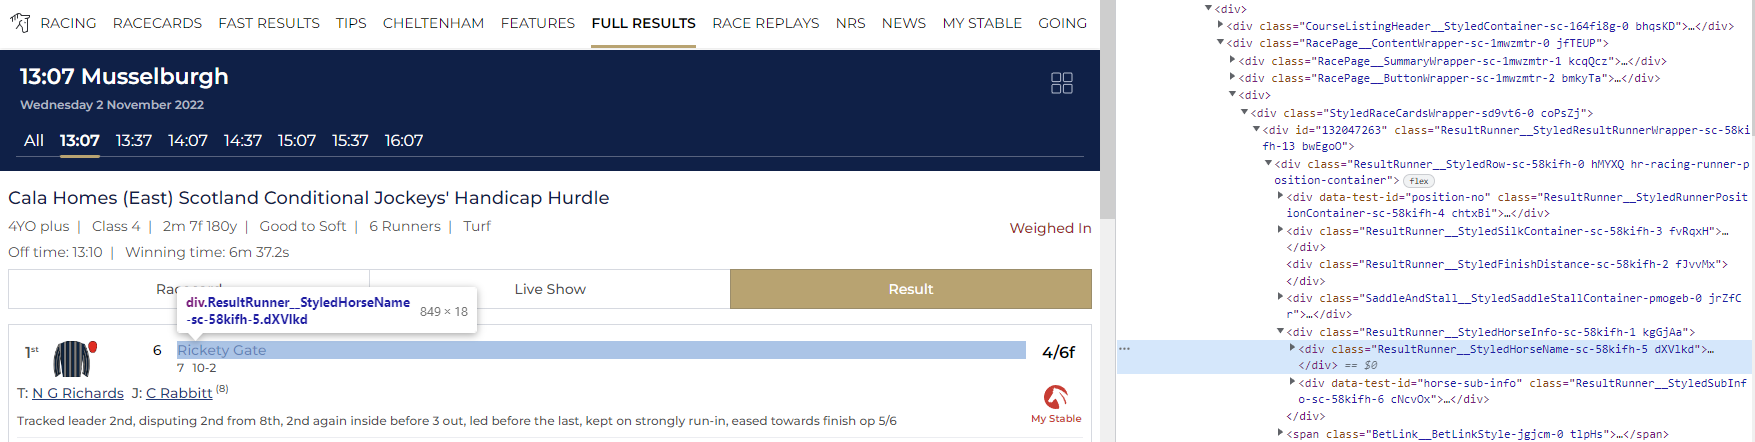

In [3]:
Image(filename="image 2.png", width=1000)

In the above example:

- The horses names are stored in containers within a `<div>` tag, with the attribute `class="ResultRunner__StyledResultRunnerWrapper-sc-58kifh-13 bwEgoO"`. These containers represent each individual runner in a race.


- As there are several items within `Horse_info_containers` such as the jockey riding the horse, the horses age etc. we need to extract only the `child container` that holds the runner's name which is stored within a `<div>` tag, with the attribute `class="ResultRunner__StyledHorseName-sc-58kifh-5 dXVlkd"`.

## 1.2) Extracting URL's

The initial step involves the extraction of the URLs for each race taking place by navigating to the landing page for the day's results on https://www.sportinglife.com and extracting all `href` links present on the page (see figure below).

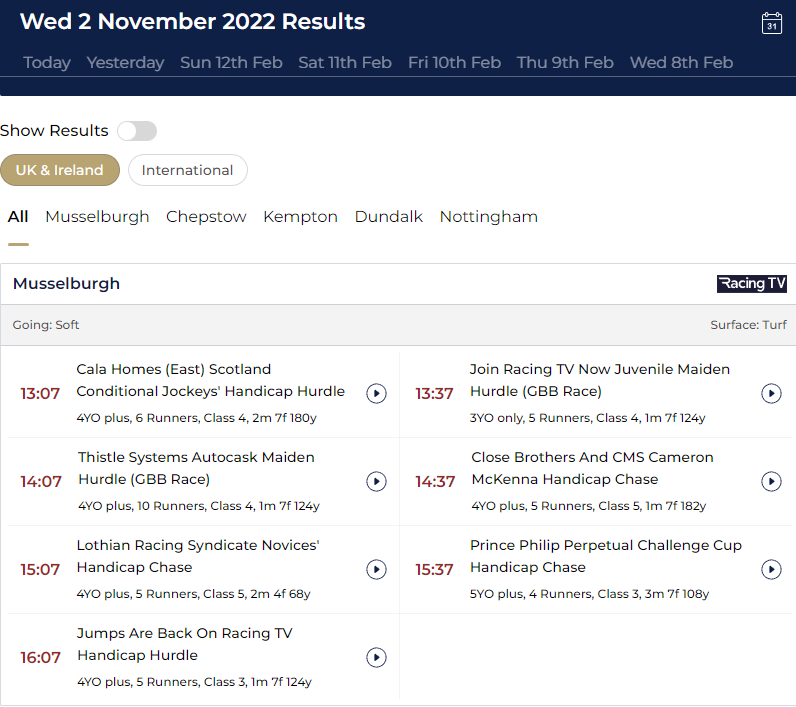

In [4]:
Image(filename="image 3.png", width=700)

Upon visiting the landing page, we can obtain the URL links for all individual races taking place on that day. However, acquiring these landing page URLs alone is not sufficient, as we need to extract two distinct sets of information - race card information and results information. These two sets of data are stored in separate URL links within each landing page link, as illustrated in the figures below.

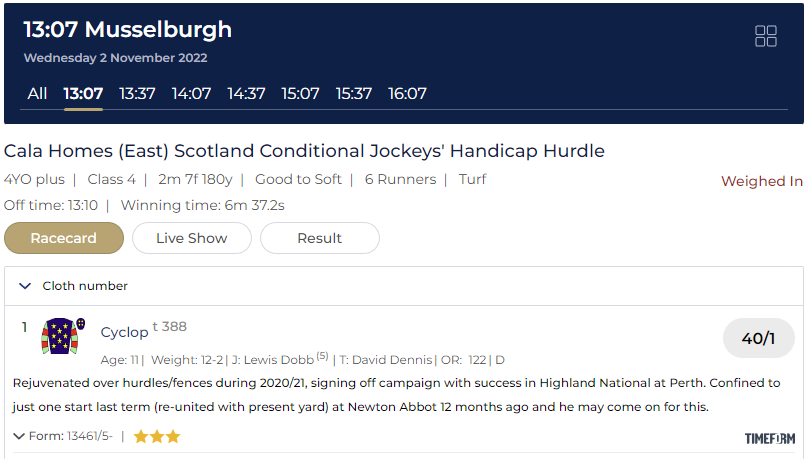

In [5]:
Image(filename="image 4.png", width=700)

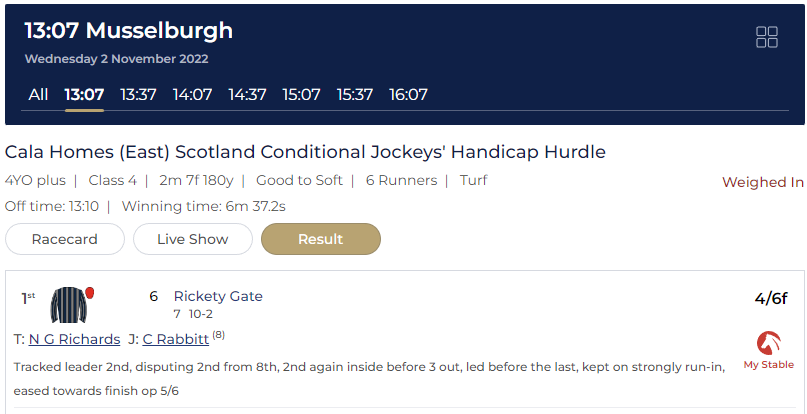

In [6]:
Image(filename="image 5.png", width=700)

To extract the two groups of URLs, we need to first access the landing page for the day containing all races. Subsequently, using those race URLs, we create two new URLs for the race card and results information that we want to scrape. The following function accomplishes these tasks:

- Creates the URL for each day's landing page by using a base URL and adding the correctly formatted date.

- Accesses the day's landing page using `requests`.

- Downloads and parses all the content on the page using `BeautifulSoup`.

- Extracts all `a` hyperlink elements (URLs).

- Filters the hyperlinks to only keep those that include or exclude the defined keywords, resulting in the final list of all race URLs.

- Creates two separate lists for result and race card URLs.

In [7]:
def get_spr_links():
    # set date format
    sporting_life_format = day.strftime("%Y-%m-%d")
    sporting_life_url = f"https://www.sportinglife.com/racing/results/{sporting_life_format}"

    # extract content from url
    uClient = requests.get(sporting_life_url, headers={'User-Agent': 'Mozilla/5.0'})
    page_html = uClient.content
    soup = BeautifulSoup(page_html, 'html.parser')
    links = soup.find_all('a')

    # only extracting urls that contain the correct key words
    final_race_links = []
    key_words_good = ['/racing/', sporting_life_format]
    key_words_bad = ['#video-player', 'meeting']
    for l in links:
        href = l.get('href')
        if not all(x in href for x in key_words_good):
            continue

        if any(x in href for x in key_words_bad):
            continue

        if len(final_race_links) >= 200:
            break

        final_race_links.append(href)

    # result urls
    results_links = []
    for link in final_race_links:
        link = link.replace('racecards/', 'results/').replace('racecard/', '')
        results_links.append(f"https://www.sportinglife.com{link}")

    # racecard urls
    racecard_links = []
    for link in final_race_links:
        link = link.replace('results/', 'racecards/').replace('racecard/', '').split('/')
        link[4] = f"{link[4]}/racecard"
        link = "/".join(link)
        racecard_links.append(f"https://www.sportinglife.com{link}")

    return racecard_links, results_links

In [8]:
get_spr_links()

(['https://www.sportinglife.com/racing/racecards/2022-11-02/musselburgh/racecard/710790/cala-homes-east-scotland-conditional-jockeys-handicap-hurdle',
  'https://www.sportinglife.com/racing/racecards/2022-11-02/musselburgh/racecard/710791/join-racing-tv-now-juvenile-maiden-hurdle-gbb-race',
  'https://www.sportinglife.com/racing/racecards/2022-11-02/musselburgh/racecard/710792/thistle-systems-autocask-maiden-hurdle-gbb-race',
  'https://www.sportinglife.com/racing/racecards/2022-11-02/musselburgh/racecard/710793/close-brothers-and-cms-cameron-mckenna-handicap-chase',
  'https://www.sportinglife.com/racing/racecards/2022-11-02/musselburgh/racecard/710794/lothian-racing-syndicate-novices-handicap-chase',
  'https://www.sportinglife.com/racing/racecards/2022-11-02/musselburgh/racecard/710795/prince-philip-perpetual-challenge-cup-handicap-chase',
  'https://www.sportinglife.com/racing/racecards/2022-11-02/musselburgh/racecard/710796/jumps-are-back-on-racing-tv-handicap-hurdle',
  'https://

## 1.3) Extracting Content From Racecard Url's

The function below extracts all parsed data from each racecard URL.

In [9]:
def get_spr_racecard_data(racecard_links):
    url_data = []
    for url in racecard_links:
        try:
            # extract content from url
            uClient = requests.get(url)
            page_html = uClient.content
            url_data.append(BeautifulSoup(page_html, 'html.parser'))
        except requests.exceptions.RequestException as e:
            print(f"Error occurred: {e}")
    return url_data

In [10]:
race_data = get_spr_racecard_data(get_spr_links()[0])

## 1.4) Extracting Race Card Data 1

This function extracts the details of each runner in a race and stores the following information in a `pandas` data frame:

- Horse name
- Horse age
- Horse weight (converted from stones/pounds to pounds)
- Jockey riding the horse
- Horse trainer
- Horse rating (if applicable)
- Horse past results (if applicable)

In [11]:
for race in race_data[0:1]:
    horse_info_containers = race.find_all("div", {"class": "Runner__StyledRunnerContainer-sc-4nkld7-0 gjQVwi"})

### Horse name
- `Horse names` are stored within a `<a>` tag, with the attribute `data-test-id="horse-name-link"`.
- To eliminate all non-letter characters in the string, we apply the `.sub` method.
- Finally, we use `.title` to convert all names to the same format.

In [12]:
horse_names_raw = []
horse_names_final = []
for container in horse_info_containers:
    horse_names_container = container.find("a", {"data-test-id": "horse-name-link"})
    horse_names_raw.append(horse_names_container.text)
    horse_names_final.append(re.sub('[^a-zA-Z ]+', '', horse_names_container.text).title())
    
print(f'Raw Data \n\n{horse_names_raw}')
print('\n-------------------------------------\n')
print(f'Final Data \n\n{horse_names_final}')

Raw Data 

['Cyclop', 'Blakeney Point', "That's A Given", 'Mullaghmore Wave', 'Native Fighter', 'Rickety Gate']

-------------------------------------

Final Data 

['Cyclop', 'Blakeney Point', 'Thats A Given', 'Mullaghmore Wave', 'Native Fighter', 'Rickety Gate']


### Horse info

- The horses age, weight, jockey, trainer, rating are stored within a `<div>` tag, with the attribute `data-test-id="horse-sub-info"`.
- To break down the values into individual pieces of information, we again utilize the `.split` method, which allows us to split the data into separate lists.

In [13]:
horse_info = []
for container in horse_info_containers:
    info = container.find("div",{"data-test-id": "horse-sub-info"}).text.strip().replace(' ', '').split('|')
    horse_info.append(info)
horse_info

[['Age: 11',
  'Weight: 12-2',
  '  J:LewisDobb(5)',
  '  T:DavidDennis',
  '  OR:122',
  '  D'],
 ['Age: 9',
  'Weight: 11-12',
  '  J:AbbieMcCain(3)',
  '  T:DMcCainJnr',
  '  OR:118',
  '  C'],
 ['Age: 8', 'Weight: 11-7', '  J:BruceLynn(3)', '  T:NWAlexander', '  OR:113'],
 ['Age: 7',
  'Weight: 11-7',
  '  J:PeterKavanagh',
  '  T:JCMcConnell',
  '  OR:113'],
 ['Age: 8',
  'Weight: 11-6',
  '  J:CharlotteJones',
  '  T:JamesMoffatt',
  '  OR:112'],
 ['Age: 7', 'Weight: 10-2', '  J:CRabbitt(8)', '  T:NGRichards', '  OR:91']]

### Horse age
- We use `.sub` to remove all non numerical characters.

In [14]:
horse_ages_raw = []
horse_ages_final = []
for info in horse_info:
    horse_ages_raw.append(info[0])
    horse_ages_final.append(int(re.sub('[^0-9]', '', info[0])))
    
print(f'Raw Data \n\n{horse_ages_raw}')
print('\n-------------------------------------\n')
print(f'Final Data \n\n{horse_ages_final}')

Raw Data 

['Age: 11', 'Age: 9', 'Age: 8', 'Age: 7', 'Age: 8', 'Age: 7']

-------------------------------------

Final Data 

[11, 9, 8, 7, 8, 7]


### Horse weight
- The horses' weights are originally given in stone and pounds. To separate these values, we use the `.replace` and `.split` methods. 
- Next, we convert the weight in stones to pounds by multiplying it by 14, since there are 14 pounds in a stone. 
- Finally, we add the original pound value to the converted weight in pounds to obtain the horse's total weight in pounds.

In [15]:
horse_weights_raw = []
horse_weights_final = []
for info in horse_info:
    horse_weights_raw.append(info[1])
    weights = info[1].replace('Weight: ', '').replace(' ', '').split('-')
    horse_weights_final.append((int(weights[0]) * 14) + int(weights[1]))
    
print(f'Raw Data \n\n{horse_weights_raw}')
print('\n-------------------------------------\n')
print(f'Final Data \n\n{horse_weights_final}')

Raw Data 

['Weight: 12-2', 'Weight: 11-12', 'Weight: 11-7', 'Weight: 11-7', 'Weight: 11-6', 'Weight: 10-2']

-------------------------------------

Final Data 

[170, 166, 161, 161, 160, 142]


### Horse jockey, trainer
- To eliminate all non-letter characters in the string, we apply the `.sub` method.
- Additionally, we remove the first character of the string, which is either J or T, by excluding it with `[1:]`.

In [16]:
horse_jockeys_raw = []
horse_jockeys_final = []
for info in horse_info:
    horse_jockeys_raw.append(info[2])
    horse_jockeys_final.append(re.sub('[^a-zA-Z]', '', info[2])[1:].strip())

print(f'Raw Data \n\n{horse_jockeys_raw}')
print('\n-------------------------------------\n')
print(f'Final Data \n\n{horse_jockeys_final}')

Raw Data 

['  J:LewisDobb(5)', '  J:AbbieMcCain(3)', '  J:BruceLynn(3)', '  J:PeterKavanagh', '  J:CharlotteJones', '  J:CRabbitt(8)']

-------------------------------------

Final Data 

['LewisDobb', 'AbbieMcCain', 'BruceLynn', 'PeterKavanagh', 'CharlotteJones', 'CRabbitt']


In [51]:
horse_trainers_raw = []
horse_trainers_final = []
for info in horse_info:
    horse_trainers_raw.append(info[3])
    horse_trainers_final.append(re.sub('[^a-zA-Z]', '', info[3])[1:].strip())
    
print(f'Raw Data \n\n{horse_trainers_raw}')
print('\n-------------------------------------\n')
print(f'Final Data \n\n{horse_trainers_final}')

Raw Data 

['  T:DavidDennis', '  T:DMcCainJnr', '  T:NWAlexander', '  T:JCMcConnell', '  T:JamesMoffatt', '  T:NGRichards']

-------------------------------------

Final Data 

['DavidDennis', 'DMcCainJnr', 'NWAlexander', 'JCMcConnell', 'JamesMoffatt', 'NGRichards']


### Horse rating
- To eliminate all non-numerical characters in the string, we apply the `.sub` method.

In [18]:
horse_ratings_raw = []
horse_ratings_final = []
for info in horse_info:
    horse_ratings_raw.append(info[4])
    horse_ratings_final.append(int(re.sub('[^0-9]', '', info[4])))

print(f'Raw Data \n\n{horse_ratings_raw}')
print('\n-------------------------------------\n')
print(f'Final Data \n\n{horse_ratings_final}')

Raw Data 

['  OR:122', '  OR:118', '  OR:113', '  OR:113', '  OR:112', '  OR:91']

-------------------------------------

Final Data 

[122, 118, 113, 113, 112, 91]


### Horse form
- The horses forms are stored within a `<div>` tag, with the attribute `data-test-id="show-form"`.
- We use `.strip`, `.replace`, `[1:]`  to remove unneeded characters.

In [19]:
horse_forms_raw = []
horse_forms_final = []
for container in horse_info_containers:
    horse_forms_raw.append(container.find("div", {"data-test-id": "show-form"}).text)
    horse_forms_final.append(container.find("div", {"data-test-id": "show-form"}).text.strip().replace( 'Form:', '')[1:])
    
print(f'Raw Data \n\n{horse_forms_raw}')
print('\n-------------------------------------\n')
print(f'Final Data \n\n{horse_forms_final}')

Raw Data 

['Form:\xa013461/5-', 'Form:\xa0562153', 'Form:\xa0431P06-', 'Form:\xa098115-0', 'Form:\xa04-60735', 'Form:\xa06382-81']

-------------------------------------

Final Data 

['13461/5-', '562153', '431P06-', '98115-0', '4-60735', '6382-81']


### Final function

In [20]:
def get_spr_racecard_horse_data(racecard_data):
    # set empty lists to store data
    horse_names = []
    horse_ages = []
    horse_weights = []
    horse_jockeys = []
    horse_trainers = []
    horse_ratings = []
    horse_forms = []

    for soup in racecard_data:
        try:
            # extract all containers holding horse info
            horse_info_containers = soup.find_all("div", {"class": "Runner__StyledRunnerContainer-sc-4nkld7-0 gjQVwi"})
            # extract data from each container
            for container in horse_info_containers:
                # extract horse name
                try:
                    horse_names_container = container.find("a", {"data-test-id": "horse-name-link"})
                    horse_names.append(re.sub('[^a-zA-Z ]+', '', horse_names_container.text).title())
                except AttributeError:
                    horse_names.append(None)

                # extract containers holding detailed horse info
                try:
                    info = container.find("div",{"data-test-id": "horse-sub-info"}).text.strip().replace(' ', '').split('|')
                except AttributeError:
                    info = []

                # extract horse age, weight, jockey, trainer, and rating
                try:
                    horse_ages.append(int(re.sub('[^0-9]', '', info[0])))
                except (IndexError, ValueError):
                    horse_ages.append(None)
                try:
                    weights = info[1].replace('Weight: ', '').replace(' ', '').split('-')
                    horse_weights.append((int(weights[0]) * 14) + int(weights[1]))
                except (IndexError, ValueError):
                    horse_weights.append(None)
                try:
                    horse_jockeys.append(re.sub('[^a-zA-Z]', '', info[2])[1:].strip())
                except (IndexError, AttributeError):
                    horse_jockeys.append(None)
                try:
                    horse_trainers.append(re.sub('[^a-zA-Z]', '', info[3])[1:].strip())
                except (IndexError, AttributeError):
                    horse_trainers.append(None)
                try:
                    horse_ratings.append(int(re.sub('[^0-9]', '', info[4])))
                except (IndexError, ValueError):
                    horse_ratings.append(None)

                # extract horse form
                try:
                    horse_forms.append(container.find("div", {"data-test-id": "show-form"}).text.strip().replace( 'Form:', ''))
                except AttributeError:
                    horse_forms.append(None)
        except requests.exceptions.RequestException as e:
            print(f"Error occurred: {e}")

    # store values in a DataFrame
    racecard_horse_df = pd.DataFrame({'horse_name': horse_names, 'horse_age': horse_ages, 'horse_weight': horse_weights,
                                      'horse_jockey': horse_jockeys, 'horse_trainer': horse_trainers,
                                      'horse_rating': horse_ratings, 'horse_form': horse_forms})
    return racecard_horse_df

In [21]:
get_spr_racecard_horse_data(get_spr_racecard_data(get_spr_links()[0])).head()

,horse_name,horse_age,horse_weight,horse_jockey,horse_trainer,horse_rating,horse_form
0,Cyclop,11,170,LewisDobb,DavidDennis,122.0,13461/5-
1,Blakeney Point,9,166,AbbieMcCain,DMcCainJnr,118.0,562153
2,Thats A Given,8,161,BruceLynn,NWAlexander,113.0,431P06-
3,Mullaghmore Wave,7,161,PeterKavanagh,JCMcConnell,113.0,98115-0
4,Native Fighter,8,160,CharlotteJones,JamesMoffatt,112.0,4-60735


## 1.5) Extracting Race Card Data 2

This function extracts the details of each race and stores the following information in a `pandas` data frame:

- Names of runners in the race (so we can merge with other data later)
- Ages permitted to run in the race
- Class of the race (if applicable)
- Distance of the race (converted from miles/furlongs/yards to yards)
- Number of runners in the race
- Current ground condition of the racecourse (going)
- Surface the race is run on
- Non-runners in the race (if applicable)

### Race runners
- To eliminate all non-letter characters in the string, we apply the `.sub` method
- Finally we use `.title` to convert all names to the same format.

In [22]:
horse_names_raw = []
horse_names_final = []
for container in horse_info_containers:
    horse_names_container = container.find("a", {"data-test-id": "horse-name-link"})
    horse_names_raw.append(horse_names_container.text)
    horse_names_final.append(re.sub('[^a-zA-Z ]+', '', horse_names_container.text).title())

print(f'Raw Data \n\n{horse_names_raw}')
print('\n-------------------------------------\n')
print(f'Final Data \n\n{horse_names_final}')

Raw Data 

['Cyclop', 'Blakeney Point', "That's A Given", 'Mullaghmore Wave', 'Native Fighter', 'Rickety Gate']

-------------------------------------

Final Data 

['Cyclop', 'Blakeney Point', 'Thats A Given', 'Mullaghmore Wave', 'Native Fighter', 'Rickety Gate']


### Race info
- The races age, class, distance, going, surface are stored within a `<li>` tag, with the attribute `class="RacingRacecardSummary__StyledAdditionalInfo-sc-1intsbr-2 gaIFRF""`.
- To break down the values into individual pieces of information, we again utilize the `.split` method, which allows us to split the data into separate lists.

In [23]:
for race in race_data[0:1]:
    raceinfo_container = race.find("li", {"class": "RacingRacecardSummary__StyledAdditionalInfo-sc-1intsbr-2 gaIFRF"})
race_info = raceinfo_container.text.replace(' ', '').split('|')
race_info

['4YO plus',
 '  Class 4',
 '  2m 7f 180y',
 '  Good to Soft',
 '  6 Runners',
 '  Turf']

### Race age
- We use `.strip`, `.replace`, `[1:]`  to remove unneeded characters.

In [49]:
race_ages_raw = race_info[0]
race_ages_final = race_info[0].strip().replace('YO', '').replace(' plus', '+').replace(' only','').replace(' to', '-')

print(f'Raw Data \n\n{race_ages_raw}')
print('\n-------------------------------------\n')
print(f'Final Data \n\n{race_ages_final}')

Raw Data 

4YO plus

-------------------------------------

Final Data 

4+


### Race class
- We use `.replace` to replace not needed string.

In [25]:
race_class_raw = race_info[1]
race_class_final = race_info[1].strip().replace('Class ', '')

print(f'Raw Data \n\n{race_class_raw}')
print('\n-------------------------------------\n')
print(f'Final Data \n\n{race_class_final}')

Raw Data 

  Class 4

-------------------------------------

Final Data 

4


### Race distance
- The race distance is initially presented in miles, furlongs, and yards. To obtain the total yardage of the race, we use a combination of the `.replace`, `.split`, and `.sum` methods.
- First, we convert all distance values to yards.
- Then, we sum these converted values together to obtain the total yardage of the race.

In [26]:
race_distance_raw = race_info[2]
race_distance_final = (race_info[2].strip()
                       .replace('1m', '1760,').replace('2m','3520,').replace('3m', '5280,')
                       .replace('4m', '7040,').replace('1f', '220,').replace('2f','440,')
                       .replace('3f', '660,').replace('4f', '880,').replace('5f', '1100,')
                       .replace('6f','1320,').replace('7f', '1540,').replace('y', '')
                       .replace(' ', '').split(',')
                      )
race_distance_final = [x for x in race_distance_final if x]
race_distance_final = sum(int(x) for x in race_distance_final)

print(f'Raw Data \n\n{race_distance_raw}')
print('\n-------------------------------------\n')
print(f'Final Data \n\n{race_distance_final}')

Raw Data 

  2m 7f 180y

-------------------------------------

Final Data 

5240


### Race going, surface, runners
- We use `.replace`, `.strip` to remove all unneeded characters.

In [50]:
race_going = race_info[3].strip()
race_runners = race_info[4].strip().replace(' Runners', '')
race_surface = race_info[5].strip()

race_going, race_runners, race_surface

('Good to Soft', '6', 'Turf')

### Race non runners
- The races age, class, distance, going, surface are stored within a `<div>` tag, with the attribute `class="NonRunner__NonRunnerWrapper-sc-1hosg08-0 hhzBUF"`.
- We use `.sub` and `.title` to remove unneeded characters and `.split` to separate each individual non runner.

### Comment:
- This race had no non runners so will return an empty list.

In [28]:
for race in race_data[0:1]:
    nonrunner_containers = race.findAll("div", {"class": "NonRunner__NonRunnerWrapper-sc-1hosg08-0 hhzBUF"})
    non_runners = []
    for container in nonrunner_containers:
        NR = container.text
        non_runners.append(re.sub('[^a-zA-Z ]+', '', NR).title().split('weight')[0].strip())
non_runners

[]

### Final function

In [29]:
def get_spr_racecard_race_data(racecard_data):
    # set empty lists to store data
    race_horses = []
    race_ages = []
    race_class = []
    race_distance = []
    race_going = []
    race_runners = []
    race_surface = []
    race_nr = []

    for soup in racecard_data:
        try:
            # extract horse names
            try:
                horse_info_containers = soup.findAll("div", {"class": "Runner__StyledRunnerContainer-sc-4nkld7-0 gjQVwi"})
                horse_names = []
                for i in horse_info_containers:
                    horse_names_container = i.find("a", {"data-test-id": "horse-name-link"})
                    horse_names.append(re.sub('[^a-zA-Z ]+', '', horse_names_container.text).title())
                race_horses.append(horse_names)
            except AttributeError:
                race_horses.append(None)

            # extract race information
            try:
                raceinfo_container = soup.find("li", {"class": "RacingRacecardSummary__StyledAdditionalInfo-sc-1intsbr-2 gaIFRF"})
                race_info = raceinfo_container.text.replace(' ', '').split('|')
                if len(race_info) == 5:
                    race_info.insert(1, None)
            except AttributeError:
                race_horses.append(None)

            # extract race age range
            try:
                race_ages.append(
                    race_info[0].strip().replace('YO', '').replace(' plus', '+').replace(' only','').replace(' to', '-'))
            except (IndexError, ValueError):
                race_ages.append(None)

            # extract race class
            try:
                race_class.append(race_info[1].strip().replace('Class', ''))
            except (IndexError, ValueError, AttributeError):
                race_class.append(None)

            # extract race distance
            try:
                distance = (race_info[2].strip().replace('1m', '1760,').replace('2m','3520,')
                .replace('3m', '5280,').replace('4m', '7040,').replace('1f', '220,').replace('2f','440,')
                .replace('3f', '660,').replace('4f', '880,').replace('5f', '1100,').replace('6f','1320,')
                .replace('7f', '1540,').replace('y', '').replace(' ', '').split(','))
                distance = [x for x in distance if x]
                distance = sum(int(x) for x in distance)
                race_distance.append(distance)
            except (IndexError, ValueError):
                race_distance.append(None)

            # ground condition, runners, surface of race
            try:
                race_going.append(race_info[3].strip())
            except (IndexError, ValueError):
                race_going.append(None)

            try:
                race_runners.append(race_info[4].strip().replace(' Runners', ''))
            except (IndexError, ValueError):
                race_runners.append(None)

            try:
                race_surface.append(race_info[5].strip())
            except (IndexError, ValueError):
                race_surface.append(None)

            # extract non runners in race
            try:
                nonrunner_containers = soup.findAll("div", {"class": "NonRunner__NonRunnerWrapper-sc-1hosg08-0 hhzBUF"})
                non_runners = []
                for container in nonrunner_containers:
                    NR = container.text
                    non_runners.append(re.sub('[^a-zA-Z ]+', '', NR).title().split('weight')[0].strip())
                race_nr.append(non_runners)
            except AttributeError:
                race_nr.append(None)
        except requests.exceptions.RequestException as e:
            print(f"Error occurred: {e}")

    # storing values in dataframe
    racecard_race_df = pd.DataFrame({'horse_name': race_horses, 'race_age': race_ages, 'race_class': race_class,
                                     'race_distance': race_distance, 'race_going': race_going, 
                                     'race_runners': race_runners, 'race_surface': race_surface, 'race_nr': race_nr})
    racecard_race_df = racecard_race_df.explode('horse_name')

    return racecard_race_df

In [30]:
get_spr_racecard_race_data(get_spr_racecard_data(get_spr_links()[0])).head()

,horse_name,race_age,race_class,race_distance,race_going,race_runners,race_surface,race_nr
0,Cyclop,4+,4,5240,Good to Soft,6,Turf,[]
0,Blakeney Point,4+,4,5240,Good to Soft,6,Turf,[]
0,Thats A Given,4+,4,5240,Good to Soft,6,Turf,[]
0,Mullaghmore Wave,4+,4,5240,Good to Soft,6,Turf,[]
0,Native Fighter,4+,4,5240,Good to Soft,6,Turf,[]


## 1.6) Extracting Result Data

Applying the same process as the previous functions but utilizing the `result` URLs instead of the `racecard` URLs, this function extracts the race results' details, including the horses:
- Name
- Finishing position
- Distance behind the horse that finished one position higher
- Industry Starting Price (ISP), a metric that will be elaborated on in a later part of the project

In [31]:
results_links = get_spr_links()[1]

In [32]:
for link in results_links[0:1]:
    uClient = requests.get(link)
    page_html = uClient.content
    soup = BeautifulSoup(page_html, 'html.parser')

In [33]:
race_result_containers = soup.findAll("div", {"class": "ResultRunner__StyledResultRunnerWrapper-sc-58kifh-13 bwEgoO"})

### Horse name
- Horse names are stored within a `<div>` tag, with the attribute `class=ResultRunner__StyledHorseName-sc-58kifh-5 dXVlkd`.
- We use `.sub` to remove any non letter characters from the horses names and `.title` to convert all names to the same format.

In [34]:
horse_names_raw = []
horse_names_final = []
for container in race_result_containers:
    horse_names_container = container.find("div", {"class": "ResultRunner__StyledHorseName-sc-58kifh-5 dXVlkd"})
    horse_names_raw.append(horse_names_container.text)
    horse_names_final.append(re.sub('[^a-zA-Z ]+', '', horse_names_container.text).title())

print(f'Raw Data \n\n{horse_names_raw}')
print('\n-------------------------------------\n')
print(f'Final Data \n\n{horse_names_final}')

Raw Data 

['Rickety Gate', 'Cyclop', 'Mullaghmore Wave', "That's A Given", 'Native Fighter', 'Blakeney Point']

-------------------------------------

Final Data 

['Rickety Gate', 'Cyclop', 'Mullaghmore Wave', 'Thats A Given', 'Native Fighter', 'Blakeney Point']


### Comment:
- Note how the position of runners have changed, as they are now ordered in finishing position compared to their randomly allocated race number when we extracted the race card data.

### Horse finishing position
- `Horse final positions` are stored within a `<div>` tag, with the attribute `"class": "ResultRunner__StyledFinishDistance-sc-58kifh-2 fJvvMx"`.
- We use `.sub` to remove any non-numerical characters.

In [35]:
horse_pos_raw = []
horse_pos_final = []
for container in race_result_containers:
    horse_pos_container = container.find("div", {"data-test-id": "position-no"})
    horse_pos_raw.append(horse_pos_container.text)
    horse_pos_final.append(re.sub('[^0-9]', '', horse_pos_container.text).title())

print(f'Raw Data \n\n{horse_pos_raw}')
print('\n-------------------------------------\n')
print(f'Final Data \n\n{horse_pos_final}')

Raw Data 

['1st', '2nd', '3rd', '4th', '5th', '6th']

-------------------------------------

Final Data 

['1', '2', '3', '4', '5', '6']


### Distance behind horse in front 
- `Horse final positions` are stored within a `<div>` tag, with the attribute `"data-test-id": "position-no"`.
- We use `.replace` to convert fractions to their yardage equivalent.

In [36]:
horse_dist_raw = []
horse_dist_final = []
for container in race_result_containers:
    horse_dist_container = container.find("div", {"class": "ResultRunner__StyledFinishDistance-sc-58kifh-2 fJvvMx"})
    horse_dist_raw.append(horse_dist_container.text)
    horse_dist_final.append(horse_dist_container.text.replace('½', '.5').replace('¾', '.75')
                                             .replace('¼', '.25').replace(' .', '.').strip())

print(f'Raw Data \n\n{horse_dist_raw}')
print('\n-------------------------------------\n')
print(f'Final Data \n\n{horse_dist_final}')

Raw Data 

['', '2 ¼', '1 ½', '16', '3 ¾', '14']

-------------------------------------

Final Data 

['', '2.25', '1.5', '16', '3.75', '14']


### Industry starting price
- Horse final ISP prices are stored within a `<span>` tag, with the attribute `"class": "BetLink__BetLinkStyle-jgjcm-0 tlpHs"`. 
- This comes natively as a fraction, so we will convert it to a decimal by first using `.sub` to keep only numerical characters and then `.split` to create separate the numerator and denominator.
- We then add the denominator and numerator together and divide the result by the denominator to get our final decimal odds.

In [37]:
horse_isp_raw = []
horse_isp_final = []
for container in race_result_containers:
    horse_isp_container = container.find("span", {"class": "BetLink__BetLinkStyle-jgjcm-0 tlpHs"})
    isp = re.sub('[^0-9/]', '', horse_isp_container.text).split('/')
    isp = (int(isp[0]) + int(isp[1])) / int(isp[1])
    horse_isp_raw.append(horse_isp_container.text)
    horse_isp_final.append(round(isp, 2))

print(f'Raw Data \n\n{horse_isp_raw}')
print('\n-------------------------------------\n')
print(f'Final Data \n\n{horse_isp_final}')

Raw Data 

['4/6f', '40/1', '11/2', '18/1', '13/2', '13/2']

-------------------------------------

Final Data 

[1.67, 41.0, 6.5, 19.0, 7.5, 7.5]


### Final function

In [38]:
def get_spr_result_race_data(results_links):
    # set empty lists to store data
    horse_names = []
    horse_positions = []
    horse_distbehinds = []
    horse_isps = []

    for link in results_links:
        try:
            # extract content from url
            uClient = requests.get(link)
            page_html = uClient.content
            soup = BeautifulSoup(page_html, 'html.parser')

            # extract all containers holding results info
            race_result_containers = soup.findAll("div", {"class": "ResultRunner__StyledResultRunnerWrapper-sc-58kifh-13 bwEgoO"})
            # extract data from each container
            for container in race_result_containers:
                # extract names of runners in race
                try:
                    horse_names_container = container.find("div", {"class": "ResultRunner__StyledHorseName-sc-58kifh-5 dXVlkd"})
                    horse_names.append(re.sub('[^a-zA-Z ]+', '', horse_names_container.text).title())
                except AttributeError:
                    horse_names.append(None)

                # extract position of runners in race
                try:
                    horse_positions_container = container.find("div",{"data-test-id": "position-no"})
                    horse_positions.append(re.sub('[^0-9]', '', horse_positions_container.text))
                except AttributeError:
                    horse_positions.append(None)

                # extract distance behinid horse infront
                try:
                    distancebehind_container = container.find("div", {"class": "ResultRunner__StyledFinishDistance-sc-58kifh-2 fJvvMx"})
                    horse_distbehinds.append(distancebehind_container.text.replace('½', '.5').replace('¾', '.75')
                                             .replace('¼', '.25').replace(' .', '.').strip())
                except AttributeError:
                    horse_distbehinds.append(None)

                # extract isp of runners in race
                try:
                    horse_isps_container = container.find("span", {"class": "BetLink__BetLinkStyle-jgjcm-0 tlpHs"})
                    isp = re.sub('[^0-9/]', '', horse_isps_container.text).split('/')
                    isp = (int(isp[0]) + int(isp[1])) / int(isp[1])
                    horse_isps.append(round(isp, 2))
                except (IndexError, ValueError, AttributeError):
                    horse_distbehinds.append(None)
        except requests.exceptions.RequestException as e:
            print(f"Error occurred: {e}")

    # storing values in dataframe
    results_race_df = pd.DataFrame({'horse_name': horse_names, 'horse_position': horse_positions,
                                    'horse_distbehind': horse_distbehinds,
                                    'horse_isp': horse_isps})

    return results_race_df

In [39]:
get_spr_result_race_data((get_spr_links()[1])).head()

,horse_name,horse_position,horse_distbehind,horse_isp
0,Rickety Gate,1,,1.67
1,Cyclop,2,2.25,41.00
2,Mullaghmore Wave,3,1.5,6.50
3,Thats A Given,4,16,19.00
4,Native Fighter,5,3.75,7.50


## 1.7) Collecting Hourly Price Data

The process of collecting hourly prices is similar to the previous steps, with the exception that the data is collected live and is not available for demonstration. The hourly prices are collected every day from 10pm to 11am for every race using www.timeform.com (see figure below) as the primary source for several different bookmakers, as well as www.sportinglife.com as a backup in case the primary script does not run for any reason. This method provides hourly price data from the following sources:

- William Hill - Bookmaker
- Bet Victor - Bookmaker
- Betfair - `Bookmaker and Exchange`
- Paddy Power - Bookmaker
- 888sport - Bookmaker
- Sky bet - Bookmaker
- Sportinglife.com - typically uses Sky bet prices.

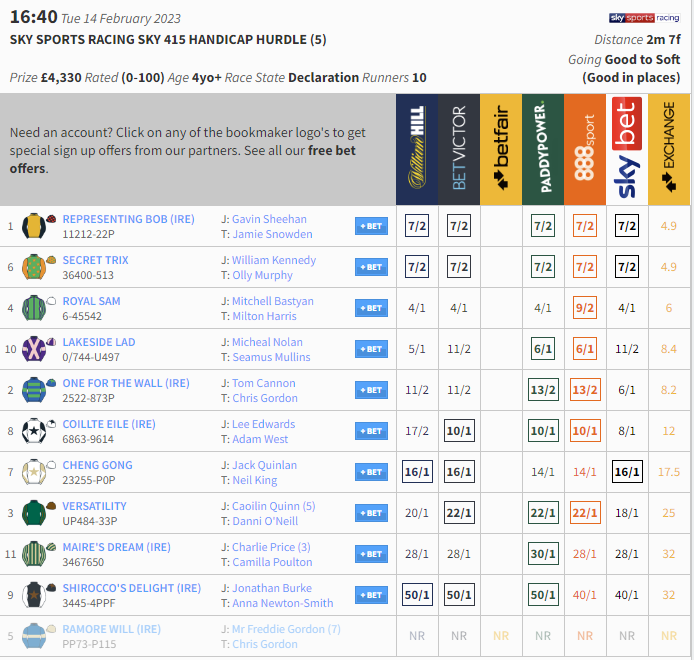

In [40]:
Image(filename="image 6.png", width=600)

In [41]:
def get_hourly_data():
    # timeform hourly data for 22/11/2022
    tf_hourly = pd.read_csv('TF.csv', encoding='utf-8')
    tf_hourly['Number'] = pd.to_numeric(tf_hourly['Number'], errors='coerce')

    # sportinglife hourly data for 22/11/2022
    spr_cols = ['Logged', 'Time', 'Name', 'Number', 'SPR']
    sporting_hourly = pd.read_csv('SPR.csv', usecols=spr_cols, encoding='utf-8')
    sporting_hourly['Number'] = pd.to_numeric(sporting_hourly['Number'], errors='coerce')

    # merging two hourly price files to get single hourly data data frame
    all_hourly_data = (pd
                       .merge(sporting_hourly, tf_hourly, on=['Time', 'Number', 'Logged'],how='outer')
                       .drop_duplicates(subset=['Logged', 'Name'])
                       .reset_index(drop=True)
                       )

    # modify the 'Name' column using the str accessor
    all_hourly_data['Name'] = all_hourly_data['Name'].str.replace("'", "").str.strip().str.title()

    return all_hourly_data

In [42]:
get_hourly_data().head()

,Logged,Time,Name,Number,SPR,WilliamHill,Betvictor,BetfairSB,PaddyPower,888sport,Skybet,BetfairEX,Location,Date
0,00:00,12:46,Bend The Light,1.0,41.0,41.000,41.00,41.00,41.00,41.00,41.00,14.00,Nottingham,02/11/2022
1,00:00,12:46,Carouselle,2.0,13.0,13.000,15.00,15.00,15.00,13.00,13.00,11.00,Nottingham,02/11/2022
2,00:00,12:46,Cherryhawk,3.0,67.0,67.000,67.00,67.00,67.00,67.00,67.00,14.00,Nottingham,02/11/2022
3,00:00,12:46,Elusive Truth,4.0,34.0,34.000,34.00,34.00,34.00,34.00,34.00,14.00,Nottingham,02/11/2022
4,00:00,12:46,Kristal Klear,5.0,2.75,2.625,2.75,2.75,2.75,2.75,2.75,2.86,Nottingham,02/11/2022


## 1.8) Historical Betfair Exchange Data Extraction Strategy
To obtain our last dataset, which pertains to daily exchange market data, we do not need to scrape the data as in previous steps. The data is already stored in downloadable `CSV` files on the website https://promo.betfair.com/betfairsp/prices (see figure below).

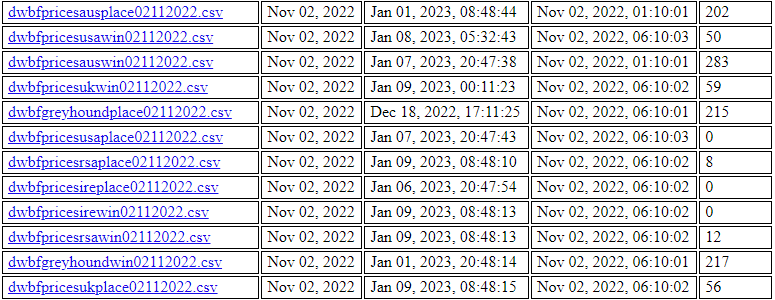

In [43]:
Image(filename="image 7.png", width=600)

The strategy to extract the data files we need is:

- Use the `requests` Python packages to make a `.get` request:
   
        req = requests.get(link)

- Read the `content` of the resulting object:
        
        data = req.content

- Write content to pandas data frame:
        
        data = pd.read_csv(io.StringIO(Data.decode('utf-8')))

## 1.9) Extracting Exchange Market Data
This function extracts exchange market information for each horse and race, returning the following information for every horse running in every race:

- `EVENT_ID` - The Exchange ID for the specific race
- `MENU_HINT` - The location and date of the race
- `EVENT_NAME` - The distance and type of the race
- `EVENT_DT` - The date and time that the race began
- `SELECTION_ID` - The Exchange ID for the specific horse
- `SELECTION_NAME` - The name of the horse
- `WIN_LOSE` - Whether the horse won or lost the race
- `BSP` - The starting price of the horse (this will be explored in detail in the next post)
- `PPWAP` - The weighted average price traded for the horse
- `MORNINGWAP` - The weighted average price traded for the horse before 11am
- `PPMAX` - The maximum price traded for the horse before the race
- `PPMIN` - The minimum price traded for the horse before the race
- `IPMAX` - The maximum price traded for the horse during the race
- `IPMIN` - The minimum price traded for the horse during the race
- `MORNINGTRADEDVOL` - The volume traded for the horse before 11am
- `PPTRADEDVOL` - The total volume traded for the horse before the race
- `IPTRADEDVOL` - The total volume traded for the horse during the race

In [44]:
def get_bf_data(day):
    # we need data from both uk and ireland races, which are stored in two seperate files
    betfair_format = day + timedelta(days=1)
    betfair_format = (betfair_format.strftime("%d%m%Y"))
    betfair_urls = [
        f"https://promo.betfair.com/betfairsp/prices/dwbfpricesukwin{betfair_format}.csv",
        f"https://promo.betfair.com/betfairsp/prices/dwbfpricesirewin{betfair_format}.csv"]

    # write data from each file to global data frame
    all_betfairex_data = pd.DataFrame([])
    for url in betfair_urls:
        try:
            req = requests.get(url)
            data = req.content
            data = pd.read_csv(io.StringIO(data.decode('utf-8')))
            data = data.drop(['EVENT_ID', 'EVENT_DT', 'SELECTION_ID'], axis=1)
            all_betfairex_data = all_betfairex_data.append(data)
        except (requests.exceptions.RequestException, pd.errors.EmptyDataError) as e:
            print(f"Error: {e}")

    # clean data
    return (all_betfairex_data
            .applymap(lambda x: x.strip() if isinstance(x, str) else x)
            .assign(SELECTION_NAME=all_betfairex_data
                    .SELECTION_NAME
                    .str.replace("'", "")
                    .str.title())
            .reset_index(drop=True)
            .drop_duplicates()
            .rename({'SELECTION_NAME': 'Name'}, axis=1)
            )

In [45]:
get_bf_data(day).head()

,MENU_HINT,EVENT_NAME,Name,WIN_LOSE,BSP,PPWAP,MORNINGWAP,PPMAX,PPMIN,IPMAX,IPMIN,MORNINGTRADEDVOL,PPTRADEDVOL,IPTRADEDVOL
0,GB / Musselburgh 2nd Nov,2m4f Nov Hcap Chs,Livings Boy An Co,0,5.100000,4.334072,3.822209,5.0,3.60,1000.0,3.25,785.34,48694.16,19202.20
1,GB / Musselburgh 2nd Nov,1m7f Mdn Hrd,Harel Du Marais,0,4.400000,3.695884,2.694458,4.6,2.46,1000.0,2.04,2293.26,81712.50,18348.26
2,GB / Musselburgh 2nd Nov,1m7f Mdn Hrd,My Macho Man,0,82.510676,83.451891,54.052775,110.0,50.00,1000.0,20.00,73.38,1628.00,1593.70
3,GB / Musselburgh 2nd Nov,1m7f Mdn Hrd,Telhimlisten,0,29.000000,25.320559,13.065036,34.0,14.00,1000.0,22.00,247.96,6462.26,1494.55
4,GB / Musselburgh 2nd Nov,1m7f Mdn Hrd,Civil Justice Gone,0,1000.000000,962.755209,812.422656,1000.0,230.00,1000.0,1000.00,31.84,188.48,56.54


## 1.10) Combining And Exporting All Data
The final step is to combine all the data we have collected:
- We start by running all the functions that collect data, obtaining detailed information about horses, races, results, and prices.
- Next, we merge all data collected from www.sportinglife.com into a single data frame based on the common value horse_name. 
- We then merge this data frame with the hourly and exchange market data sets.

- To complete the process, we export the final data and hourly price data to CSV files, filtering out all unnecessary data from the output files.

### Comment:
- To ensure that we have access to information about non-runners in our next project post, we export the raw hourly price data as a separate file. This file will contain additional details that are not available in our main file.

In [46]:
def main():
    # racecard, results data
    racecard_data = get_spr_racecard_data(get_spr_links()[0])
    racecard_horse_data = get_spr_racecard_horse_data(racecard_data)
    racecard_race_data = get_spr_racecard_race_data(racecard_data)
    results_data = get_spr_result_race_data(get_spr_links()[1])
    spr_data_frames = [racecard_horse_data, racecard_race_data, results_data]
    spr_data = reduce(lambda left, right: pd.merge(left, right, on='horse_name'), spr_data_frames)
    
    # hourly, betfair data
    hourly_data = get_hourly_data()
    bf_data = get_bf_data(day)
    
    # merging spr and hourly data frames
    daily_data_file = pd.merge(spr_data, hourly_data, left_on='horse_name', right_on='Name')
    
    # merging daily_data_file and exchange data frames
    final_daily_data_file = pd.merge(daily_data_file, bf_data, on='Name')
    
    # exporting data files
    file_format = (day.strftime("%d%m%Y"))
    final_daily_data_file.query('Logged != "22:00" & Logged != "23:00"').to_csv(f'{file_format}.csv', header=True, index=False)
    hourly_data.query('Logged != "22:00" & Logged != "23:00"').to_csv(f'{file_format} hourly data.csv', header=True, index=False)
    print(final_daily_data_file.head())
    print(final_daily_data_file.info())

In [47]:
main()

  horse_name  horse_age  horse_weight horse_jockey horse_trainer  \
0     Cyclop         11           170    LewisDobb   DavidDennis   
1     Cyclop         11           170    LewisDobb   DavidDennis   
2     Cyclop         11           170    LewisDobb   DavidDennis   
3     Cyclop         11           170    LewisDobb   DavidDennis   
4     Cyclop         11           170    LewisDobb   DavidDennis   

   horse_rating horse_form race_age race_class  race_distance    race_going  \
0         122.0   13461/5-       4+          4           5240  Good to Soft   
1         122.0   13461/5-       4+          4           5240  Good to Soft   
2         122.0   13461/5-       4+          4           5240  Good to Soft   
3         122.0   13461/5-       4+          4           5240  Good to Soft   
4         122.0   13461/5-       4+          4           5240  Good to Soft   

  race_runners race_surface race_nr horse_position horse_distbehind  \
0            6         Turf      []          